In [87]:
tags=[\
      'Modality','Manufacturer','StudyDescription','SeriesDescription','ManufacturerModelName',\
        'BodyPartExamined','ScanningSequence','SequenceVariant','MRAcquisitionType',\
        'SequenceName','ScanOptions','SliceThickness','RepetitionTime','EchoTime','InversionTime',\
        'MagneticFieldStrength','NumberOfPhaseEncodingSteps','EchoTrainLength','PercentSampling',\
        'PercentPhaseFieldOfView','PixelBandwidth','AcquisitionMatrix','ImageType',\
        'FlipAngle','VariableFlipAngleFlag','PatientPosition','PhotometricInterpretation','Rows',\
        'Columns','PixelSpacing','ContrastBolusVolume','ContrastBolusTotalDose',\
        'ContrastBolusIngredient','ContrastBolusIngredientConcentration',\
        'PatientOrientation','ImageLaterality','ImageComments','ImagePositionPatient',\
        'ImageOrientationPatient','SamplesPerPixel','PhotometricInterpretation',\
        'PlanarConfiguration','PixelAspectRatio','BitsAllocated','BitsStored','HighBit',\
        'PixelRepresentation','ColorSpace','AngioFlag','ImagingFrequency','EchoNumbers',\
        'SpacingBetweenSlices','TriggerTime','NominalInterval','BeatRejectionFlag','LowRRValue',\
        'HighRRValue','IntervalsAcquired','PVCRejection','SkipBeats','HeartRate','TriggerWindow',\
        'ReconstructionDiameter','ReceiveCoilName','TransmitCoilName','InPlanePhaseEncodingDirection',\
        'SAR','dBdt', 'B1rms', 'TemporalPositionIdentifier', 'NumberOfTemporalPositions', 'TemporalResolution',\
        'SliceProgressionDirection','IsocenterPosition', \
         \
         'KVP','DataCollectionDiameter','DistanceSourceToDetector','DistanceSourceToPatient',\
         'GantryDetectorTilt','TableHeight','RotationDirection','ExposureTime','XRayTubeCurrent','Exposure',\
         'ImageAndFluoroscopyAreaDoseProduct','FilterType','GeneratorPower','FocalSpots','ConvolutionKernel',\
         'WaterEquivalentDiameter','RevolutionTime','SingleCollimationWidth','TotalCollimationWidth',\
         'TableSpeed','TableFeedPerRotation','SpiralPitchFactor','DataCollectionCenterPatient',\
         'ReconstructionTargetCenterPatient','ExposureModulationType','EstimatedDoseSaving',\
         'CTDIvol','CalciumScoringMassFactorPatient','CalciumScoringMassFactorDevice','EnergyWeightingFactor',\
         'MultienergyCTAcquisition','AcquisitionNumber','RescaleIntercept','RescaleSlope',\
         'PatientSupportAngle','TableTopLongitudinalPosition','TableTopLateralPosition',\
         'TableTopPitchAngle','TableTopRollAngle',\
      \
      'StageName','StageNumber','NumberOfStages','ViewName','ViewNumber','NumberOfEventTimers',\
      'NumberOfViewsInStage','EventElapsedTimes','EventTimerNames','HeartRate','IVUSAcquisition','IVUSPullbackRate','IVUSGatedRate',\
      'TransducerType','FocusDepth','MechanicalIndex','BoneThermalIndex','CranialThermalIndex',\
      'SoftTissueThermalIndex','SoftTissueFocusThermalIndex','DepthOfScanField',\
      \
      'ExposureInuAs','AcquisitionDeviceProcessingDescription','AcquisitionDeviceProcessingCode',\
      'CassetteOrientation','CassetteSize','ExposuresOnPlate','RelativeXRayExposure','ExposureIndex',\
      'TargetExposureIndex','DeviationIndex','Sensitivity','PixelSpacingCalibrationType','PixelSpacingCalibrationDescription',\
      'DerivationDescription','AcquisitionDeviceProcessingDescription','AcquisitionDeviceProcessingCode',\
      'RescaleType','WindowCenterWidthExplanation','CalibrationImage','PresentationLUTShape',\
     \
      'PlateID','CassetteID','FieldOfViewShape','FieldOfViewDimensions','ImagerPixelSpacing',\
      'ExposureIndex','TargetExposureIndex','DeviationIndex','Sensitivity','DetectorConditionsNominalFlag',\
      'DetectorTemperature','DetectorType','DetectorConfiguration','DetectorDescription','DetectorMode',\
      'DetectorBinning','DetectorElementPhysicalSize','DetectorElementSpacing','DetectorActiveShape',\
      'DetectorActiveDimensions','DetectorActiveOrigin','DetectorManufacturerName','DetectorManufacturerModelName',\
      'FieldOfViewOrigin','FieldOfViewRotation','FieldOfViewHorizontalFlip','PixelSpacingCalibrationType',\
      'PixelSpacingCalibrationDescription',\
      \
      'PrimaryPromptsCountsAccumulated','SecondaryCountsAccumulated','SliceSensitivityFactor',\
      'DecayFactor','DoseCalibrationFactor','ScatterFractionFactor','DeadTimeFactor','IsocenterPosition',\
      'PatientGantryRelationshipCodeSequence','TriggerSourceOrType','CardiacFramingType','PVCRejection',\
      'CollimatorGridName','CollimatorType','CorrectedImage','TypeOfDetectorMotion','Units','CountsSource',\
      'ReprojectionMethod','SUVType','RandomsCorrectionMethod','RandomsCorrectionMethod','DecayCorrection',\
      'ReconstructionMethod','DetectorLinesOfResponseUsed','ScatterCorrectionMethod','ScatterCorrectionMethod',\
      'AxialMash','TransverseMash','CoincidenceWindowWidth','SecondaryCountsType',\
      \
      'PositionerType','PositionerPrimaryAngle','PositionerSecondaryAngle','PositionerPrimaryAngleDirection',\
      'ImageLaterality','BreastImplantPresent','PartialView','PartialViewDescription','OrganExposed'\
     ]

tags=list(set(tags))
tags.sort()


def get_first_files(dir_in,dir_out,tags):
    ndirs=0
    for root, dirs, files in os.walk(dir_in):
        if files:
            first_file = os.path.join(root, files[0])
            try:
                if pydicom.misc.is_dicom(first_file):
                    if ndirs % 1000 == 0: print('{} DICOM files written'.format(ndirs))
                    ndirs=ndirs+1                                
                    #print('found DICOM file:',first_file)
                    ds=pydicom.filereader.dcmread(first_file,stop_before_pixels=True,specific_tags=tags)
                    outfil=dir_out+'/'+pydicom.uid.generate_uid()+'.dcm'                    
                    #print('writing:',outfil)
                    pydicom.filewriter.dcmwrite(outfil,ds)
            except Exception as e:
                print('error reading',first_file)
                

In [88]:
import os, pydicom, numpy as np
from itertools import product

In [89]:
ntags=len(tags)

In [90]:
in_dir="/data/ImagingCommons/data" #/home/mmilchenko/temp/dcm"
tag_set=set(tags)
tag_frequency=np.zeros(ntags)
tag_frequency_correlation=np.zeros([ntags,ntags])
tag_index={}

for i,t in zip(range(ntags),tags): tag_index[t]=i
    
num_files=0
present_tags=set()

for root,dirs,files in os.walk(in_dir):
    for f in files:
        file=os.path.join(root,f)
        ds=pydicom.filereader.dcmread(file)
        present_tags.clear()
        
        #pupulate tag frequency vector
        for elem in ds:
            kw=pydicom.datadict.keyword_for_tag(elem.tag)            
            if kw in tag_set:
                tag_frequency[tag_index[kw]]+=1
                present_tags.add(kw)
            
        #populate co-occurrence matrix:
        for t1,t2 in product(present_tags,present_tags):
            i1,i2=tag_index[t1],tag_index[t2]
            tag_frequency_correlation[i1,i2]+=1            
            
            #break
        #break
        num_files+=1
        if num_files % 1000 == 0: print('processed {} files'.format(num_files))
    #break
    
for i in range(ntags): tag_frequency[i]/=num_files

tag_frequency

processed 1000 files
processed 2000 files
processed 3000 files
processed 4000 files
processed 5000 files
processed 6000 files
processed 7000 files
processed 8000 files
processed 9000 files


/nrgpackages/packages/tensorflow2/lib/python3.7/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR IS: '0.000000'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


processed 10000 files
processed 11000 files
processed 12000 files
processed 13000 files
processed 14000 files
processed 15000 files
processed 16000 files
processed 17000 files
processed 18000 files


array([9.91438076e-02, 3.05066259e-01, 8.43376779e-01, 9.68097290e-01,
       8.31106506e-01, 0.00000000e+00, 2.72672738e-04, 1.31428260e-02,
       9.73114468e-01, 9.73114468e-01, 4.88684081e-01, 5.45345476e-05,
       5.45345476e-05, 4.74450564e-03, 3.32660741e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.45345476e-05,
       1.09069095e-04, 0.00000000e+00, 4.74450564e-02, 0.00000000e+00,
       0.00000000e+00, 9.73114468e-01, 2.30953809e-01, 2.31826362e-01,
       2.31553689e-01, 3.08883678e-01, 7.14402574e-03, 5.45345476e-05,
       0.00000000e+00, 0.00000000e+00, 9.81621857e-04, 7.03495665e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.45345476e-05,
       8.94366581e-03, 2.72672738e-04, 0.00000000e+00, 1.09069095e-04,
       1.09069095e-02, 9.12362982e-02, 1.10159786e-02, 6.17331079e-02,
       1.08523750e-02, 1.08523750e-02, 0.00000000e+00, 1.07433059e-02,
       1.07433059e-02, 1.07433059e-02, 1.02088673e-01, 5.48072204e-02,
      

In [7]:
from IPython.core.display import HTML
style = """
<style>
div.output_area {
    overflow-y: scroll;
}
div.output_area img {
    max-width: unset;
}
</style>
"""
HTML(style) 

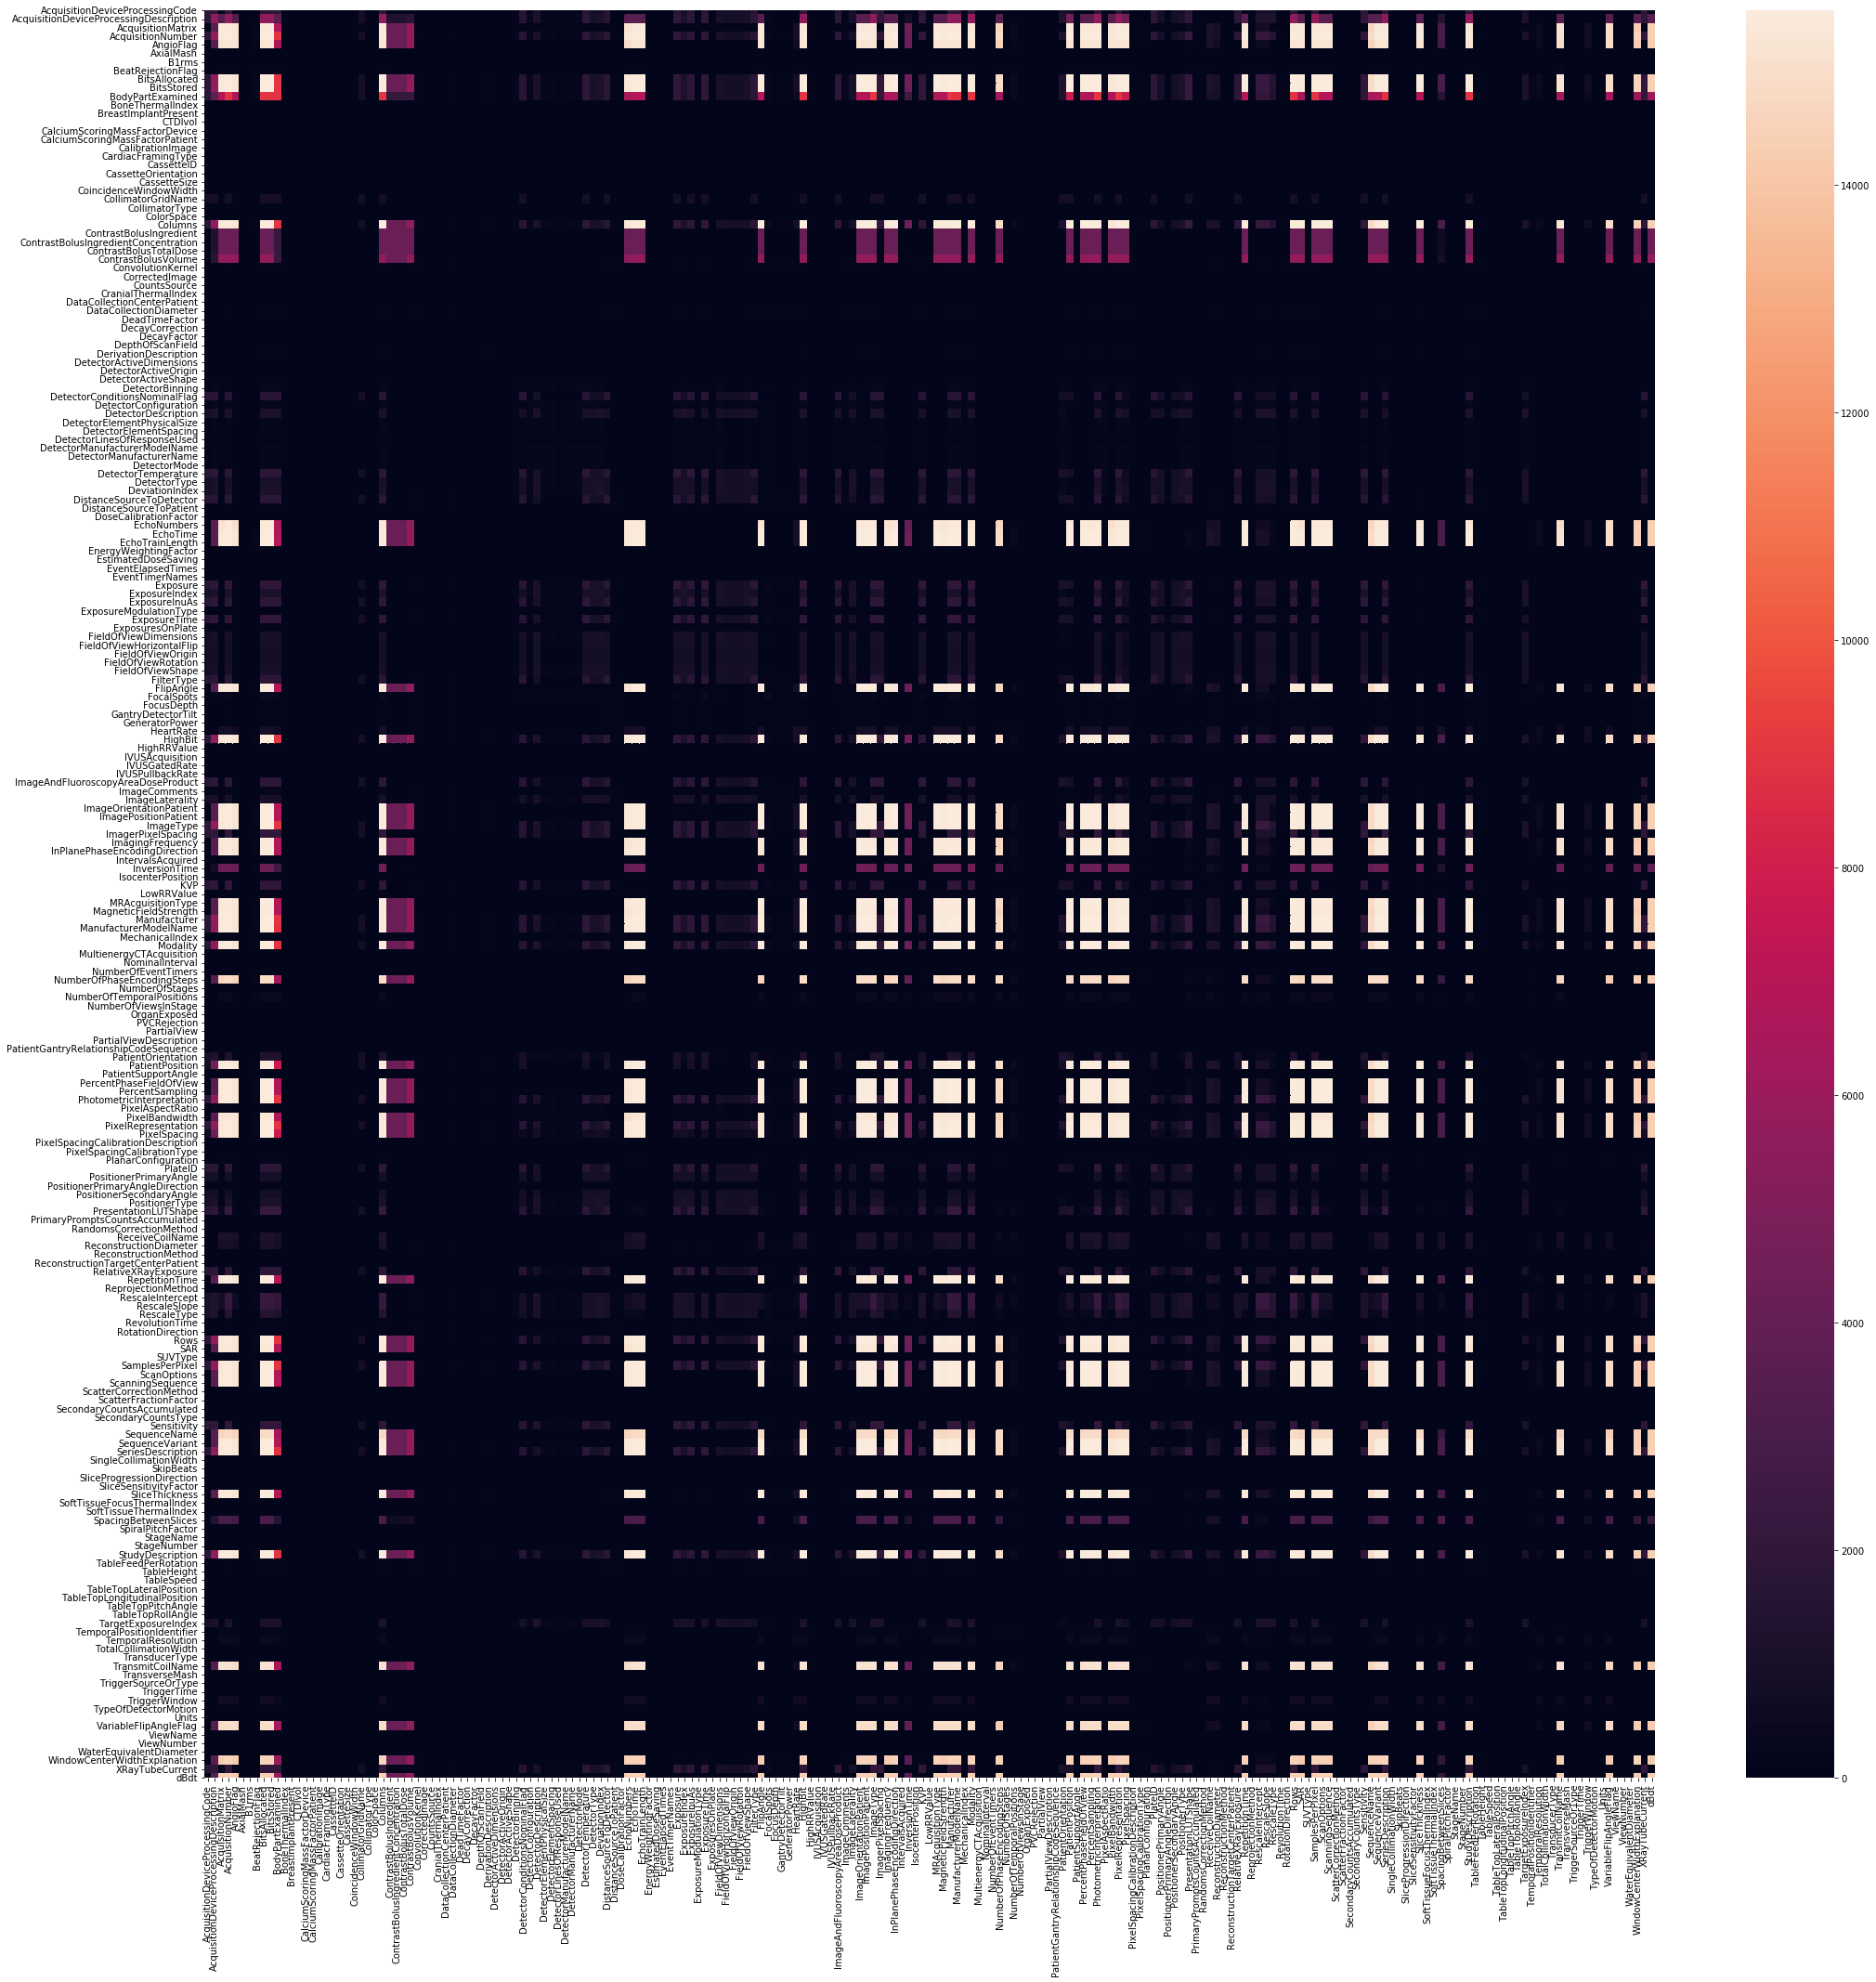

In [8]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize = (35,35))
seaborn.heatmap(tag_frequency_correlation,xticklabels=tags,yticklabels=tags,robust=True)

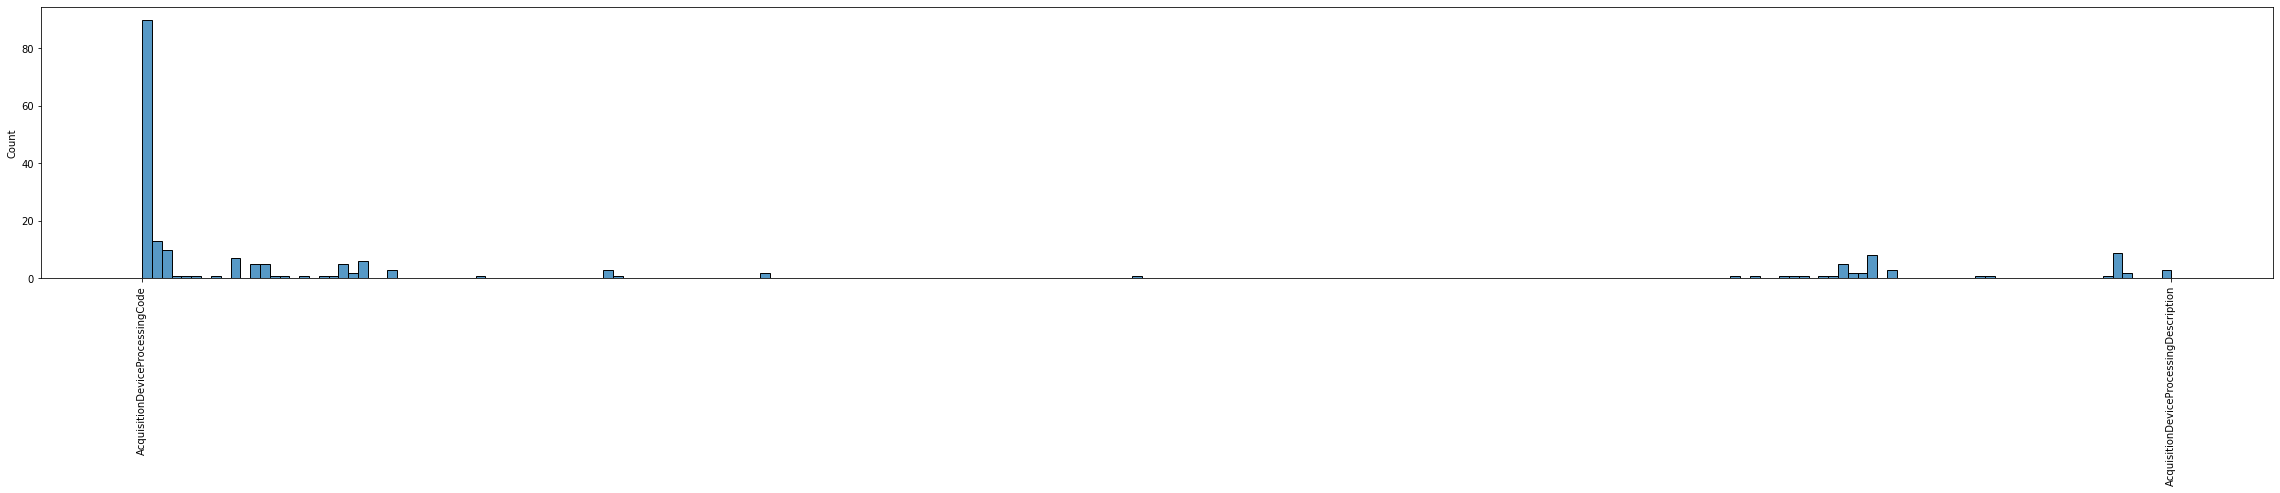

In [86]:
import pandas as pd
from IPython.core.display import HTML
style = """
<style>
div.output_area {
    overflow-y: scroll;
}
div.output_area img {
    max-width: unset;
}
</style>
"""

df=pd.DataFrame(tag_frequency,index=tags)
fig=plt.figure(figsize = (40,5))
ax=plt.gca()

#plt.xticks(range(ntags), tags, rotation=90);
plt.xticks(range(ntags), tags, rotation=90);
ax=seaborn.histplot(tag_frequency,bins=ntags,cumulative=False,ax=ax)
#ax.set_xticks(range(ntags));
#ax.set_xticklabels(tags,rotation=90);

#plt.autoscale(enable=True,axis='x',tight=True)


In [74]:
np.linspace(0,range(ntags),ntags)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.85436893e-03, 9.70873786e-03, ...,
        9.90291262e-01, 9.95145631e-01, 1.00000000e+00],
       [0.00000000e+00, 9.70873786e-03, 1.94174757e-02, ...,
        1.98058252e+00, 1.99029126e+00, 2.00000000e+00],
       ...,
       [0.00000000e+00, 9.90291262e-01, 1.98058252e+00, ...,
        2.02019417e+02, 2.03009709e+02, 2.04000000e+02],
       [0.00000000e+00, 9.95145631e-01, 1.99029126e+00, ...,
        2.03009709e+02, 2.04004854e+02, 2.05000000e+02],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        2.04000000e+02, 2.05000000e+02, 2.06000000e+02]])

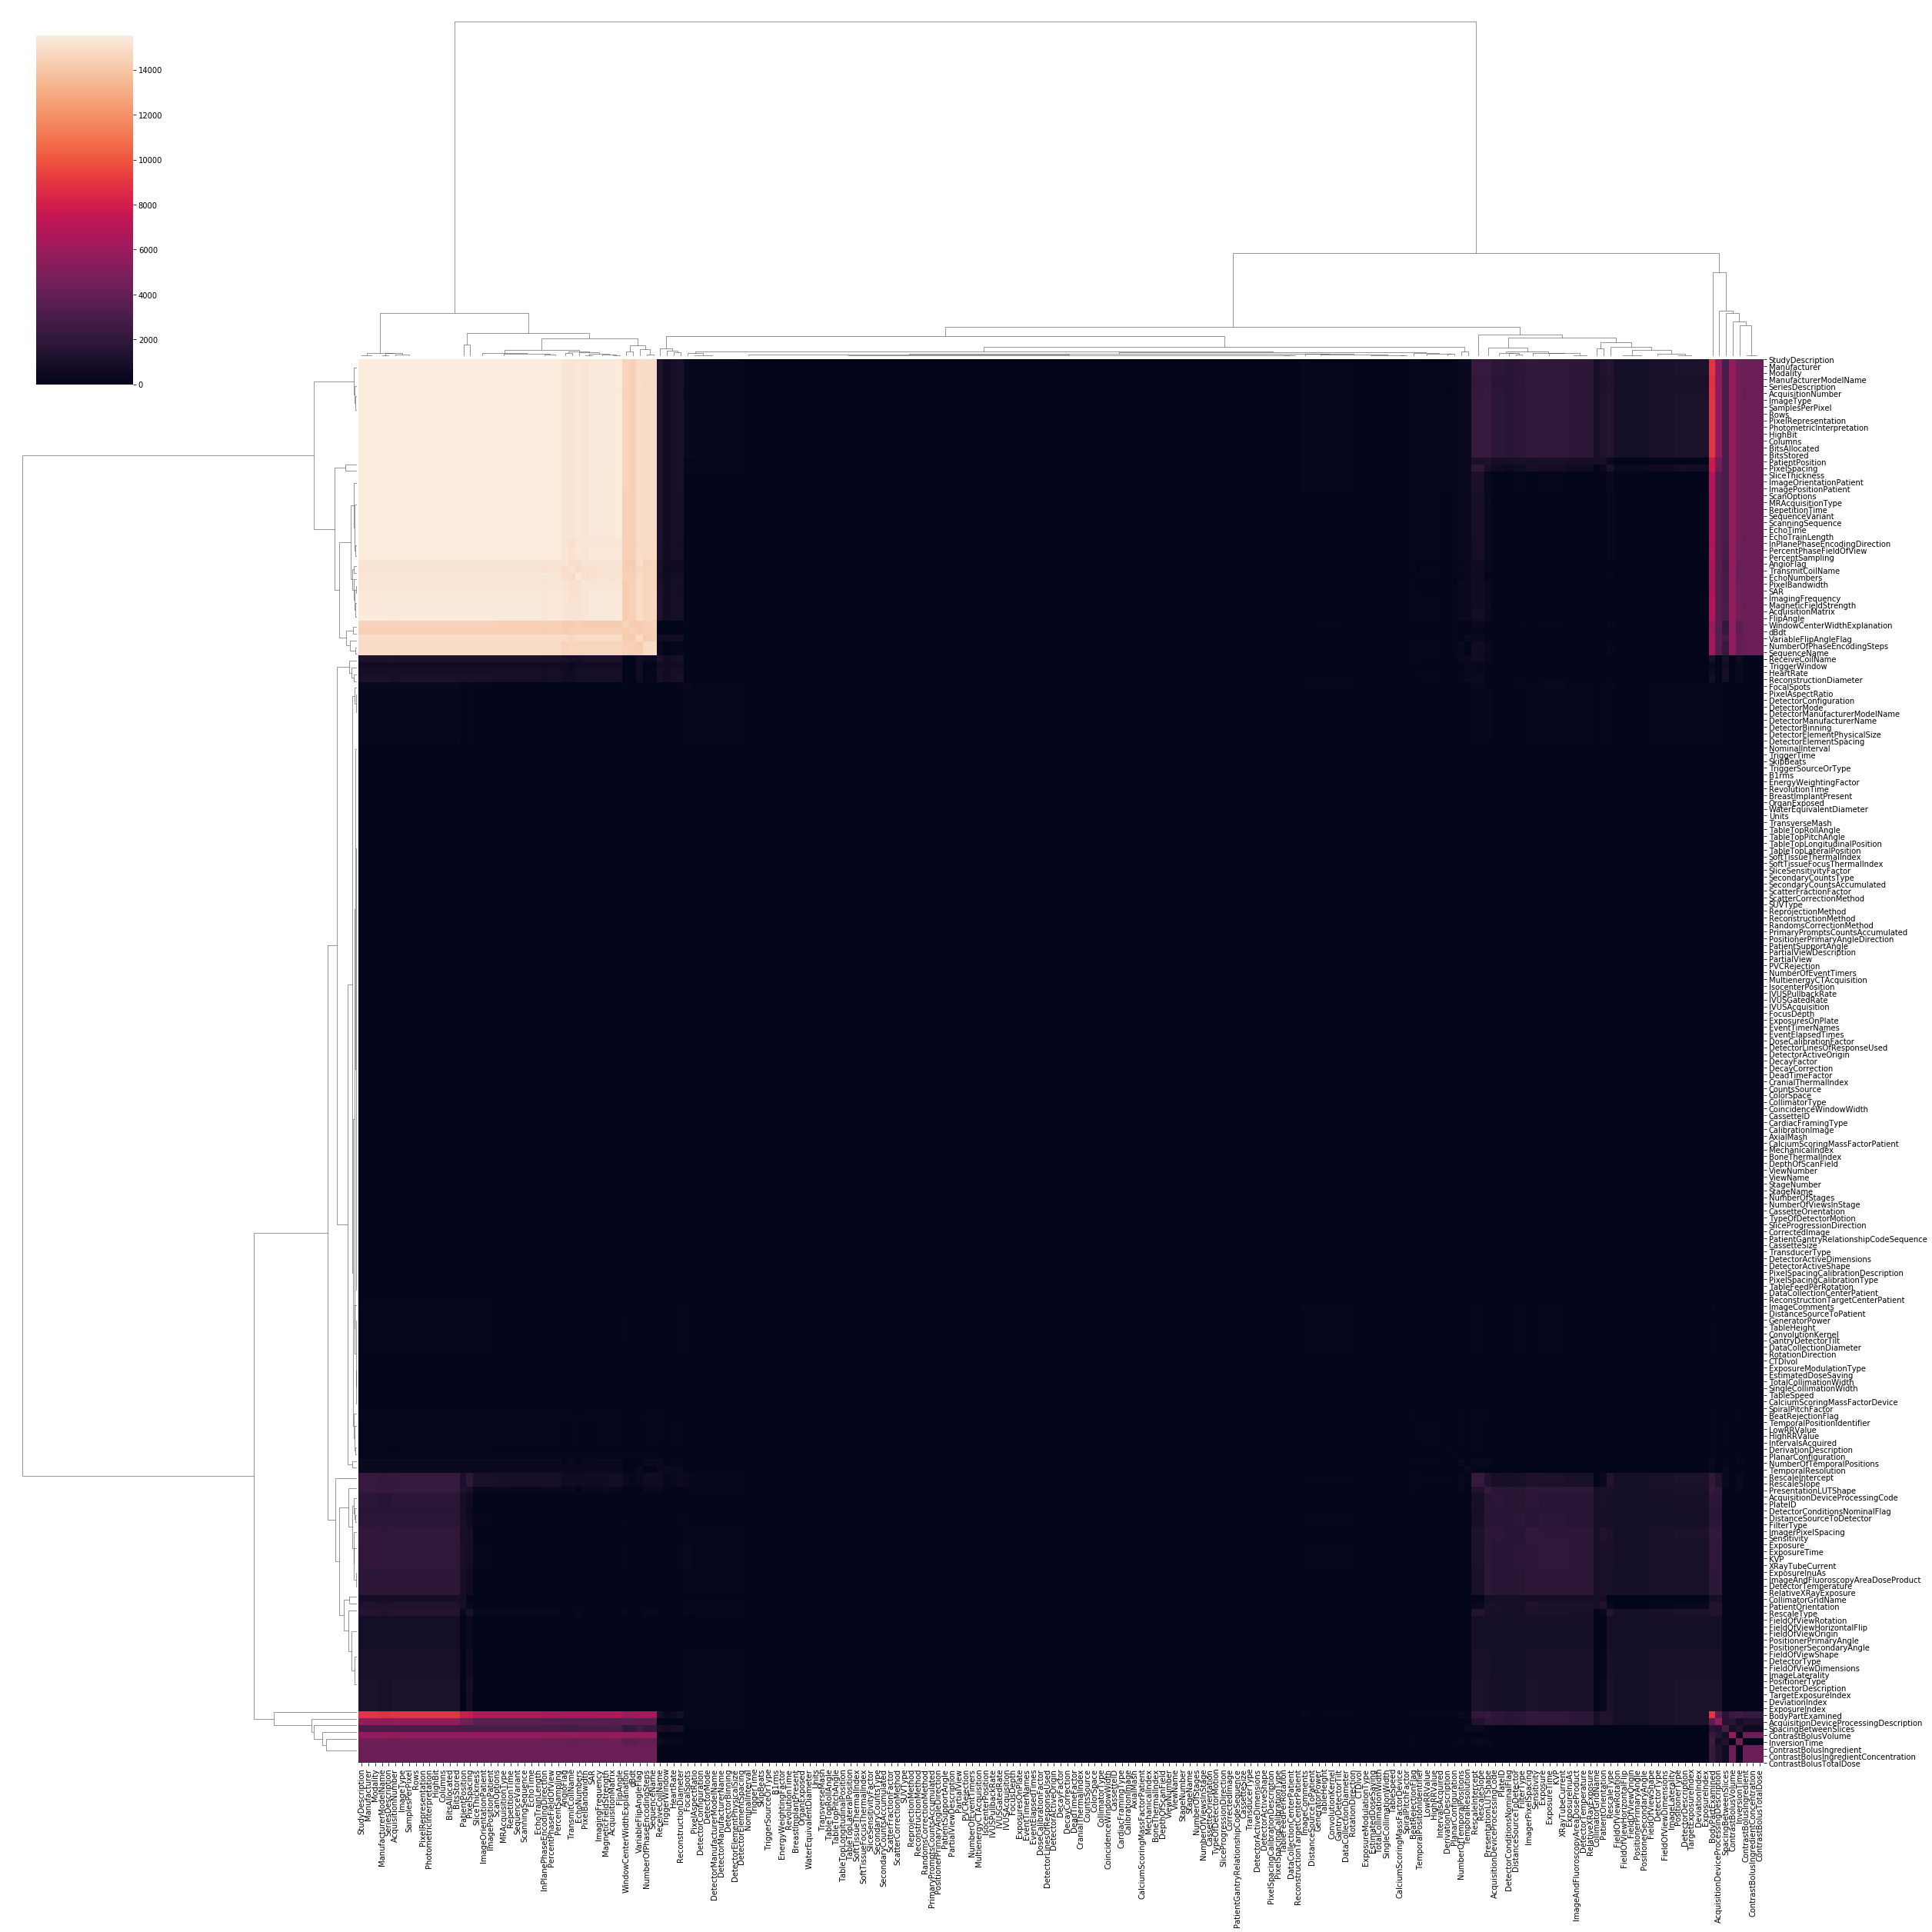

In [14]:
from IPython.core.display import HTML
style = """
<style>
div.output_area {
    overflow-y: scroll;
}
div.output_area img {
    max-width: unset;
}
</style>
"""
HTML(style) 

seaborn.clustermap(tag_frequency_correlation,xticklabels=tags,yticklabels=tags,robust=True,figsize=(35,35))